Project Name: Immigration Arrival Patterns in Canada (2011)
Data Source: https://open.canada.ca/data/en/dataset/9adddd8a-e15b-497c-86af-641457a78bea
Objective: Analyze immigrant arrival periods across provinces and metros.

In [2]:
# Detecting the file encoding
import chardet
with open('immigrant-status-and-period-of-immigration-e.csv', 'rb') as f:
    encoding_result = chardet.detect(f.read())
    print(encoding_result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
# Data Reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('immigrant-status-and-period-of-immigration-e.csv', encoding='ISO-8859-1', header = 1)
df.rename(columns={df.columns[0]: 'immigration_status'}, inplace=True)

# Removing the leading and trailing spaces off of the cells.
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16116\390427648.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,immigration_status,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia / Nouvelle-Écosse,New Brunswick / Nouveau-Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,...,Halifax CMA,Québec City CMA,Montréal CMA,Ottawa - Gatineau CMA,Toronto CMA,Winnipeg CMA,Regina CMA,Calgary CMA,Edmonton CMA,Vancouver CMA
0,Total - Immigrant status and period of immigra...,27259525,431045,114195,768060,622440,6474590,10473665,946940,812505,...,325050,634200,3120060,1005005,4546140,590295,170070,976570,935285,1926230
1,Non-immigrants,20543700,421170,107085,717140,593840,5511745,6912395,774365,744685,...,292010,602990,2278110,773525,2047970,451125,149025,665410,698240,1009070
2,Immigrants,6398855,8315,6415,44660,25890,902990,3442895,165005,60500,...,28685,28605,789440,220640,2416425,133380,19055,290760,216460,870035
3,Before 1996,3837770,5415,3455,28690,16530,496790,2148600,90000,29120,...,16775,11985,439575,130700,1408665,74005,9415,145920,123735,486590
4,1996 to 2005,1620885,1215,920,7485,3970,227160,884025,31800,11165,...,5380,8515,196205,57975,691240,24695,3690,88405,52650,253685


In [4]:
# Data Checks
# Shape of the dataset
print("Shape:", df.shape)

# Data types
print("\nData types:\n", df.dtypes)

# Null values
print("\nNull values:\n", df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary statistics:\n", df.describe())

Shape: (6, 26)

Data types:
 immigration_status                   object
Canada                                int64
Newfoundland and Labrador             int64
Prince Edward Island                  int64
Nova Scotia / Nouvelle-Écosse         int64
New Brunswick / Nouveau-Brunswick     int64
Quebec                                int64
Ontario                               int64
Manitoba                              int64
Saskatchewan                          int64
Alberta                               int64
British Columbia                      int64
Yukon                                 int64
Northwest Territories                 int64
Nunavut                               int64
St. John's CMA                        int64
Halifax CMA                           int64
Québec City CMA                       int64
Montréal CMA                          int64
Ottawa - Gatineau CMA                 int64
Toronto CMA                           int64
Winnipeg CMA                          int64
Reg

                                   Immigrants
Canada                                6398855
Ontario                               3442895
Toronto CMA                           2416425
British Columbia                      1139255
Quebec                                 902990
Vancouver CMA                          870035
Montréal CMA                           789440
Alberta                                596100
Calgary CMA                            290760
Ottawa - Gatineau CMA                  220640
Edmonton CMA                           216460
Manitoba                               165005
Winnipeg CMA                           133380
Saskatchewan                            60500
Nova Scotia / Nouvelle-Écosse           44660
Halifax CMA                             28685
Québec City CMA                         28605
New Brunswick / Nouveau-Brunswick       25890
Regina CMA                              19055
Newfoundland and Labrador                8315
Prince Edward Island              

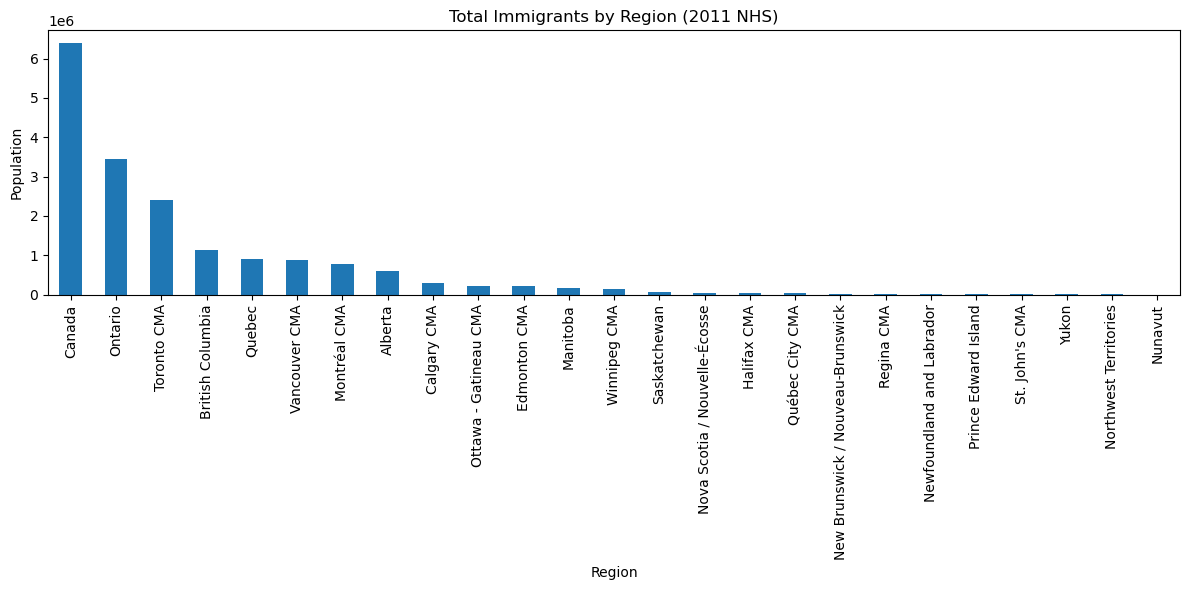

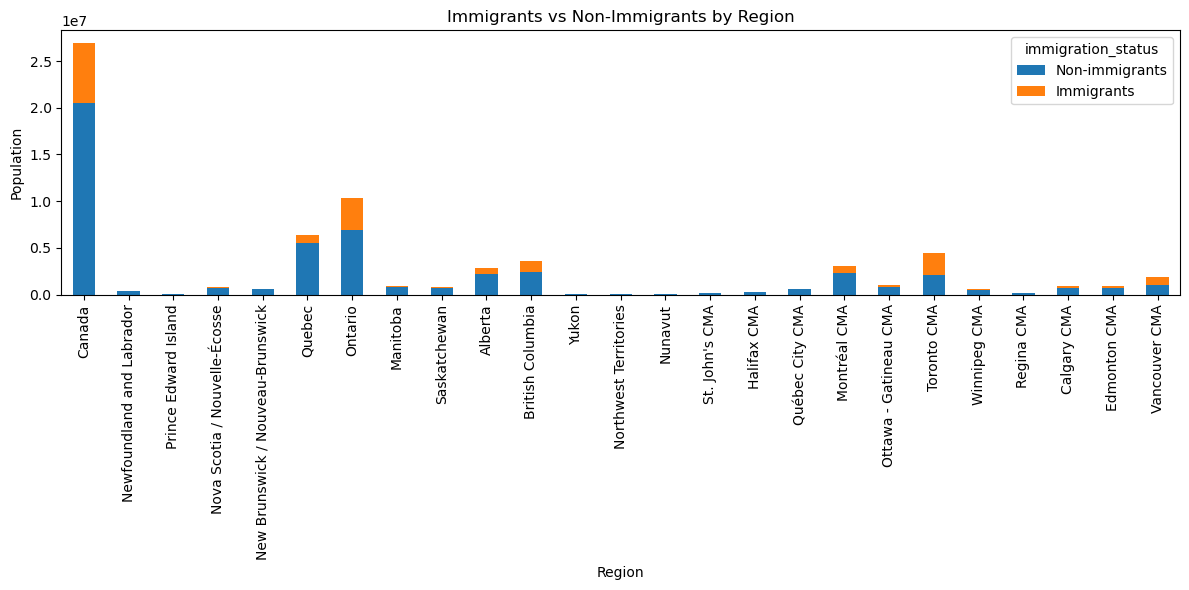

In [5]:
# Exploratory Data Analysis
# A. Total immigrant population per region
immigrant_df = df[df['immigration_status'] == 'Immigrants']
immigrant_totals = immigrant_df.drop(columns='immigration_status').T
immigrant_totals.columns = ['Immigrants']
immigrant_totals = immigrant_totals.sort_values(by='Immigrants', ascending=False)
print(immigrant_totals)

# B. Plot immigrant totals by region
immigrant_totals.plot(kind='bar', figsize=(12,6), legend=False)
plt.title("Total Immigrants by Region (2011 NHS)")
plt.xlabel("Region")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# C. Proportion of immigrants vs non-immigrants
subset = df[df['immigration_status'].isin(['Non-immigrants', 'Immigrants'])].set_index('immigration_status').T
subset.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Immigrants vs Non-Immigrants by Region")
plt.xlabel("Region")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# Melting the data for analysis
df_melted = df.melt(id_vars='immigration_status', 
                    var_name='region', 
                    value_name='population')
df_melted.head()

,immigration_status,region,population
0,Total - Immigrant status and period of immigra...,Canada,27259525
1,Non-immigrants,Canada,20543700
2,Immigrants,Canada,6398855
3,Before 1996,Canada,3837770
4,1996 to 2005,Canada,1620885


In [7]:
# Filtering out the provinces and territories and CMAs into separate dataframes

provinces_territories = [
    "Newfoundland and Labrador",
    "Prince Edward Island",
    "Nova Scotia / Nouvelle-Écosse",
    "New Brunswick / Nouveau-Brunswick",
    "Quebec",
    "Ontario",
    "Manitoba",
    "Saskatchewan",
    "Alberta",
    "British Columbia",
    "Yukon",
    "Northwest Territories",
    "Nunavut"
]

df_by_region = df_melted[df_melted['region'].isin(provinces_territories)]
df_by_CMA = df_melted[df_melted['region'].str.endswith('CMA', na=False)].copy()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16116\496451227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immigrants_provinces['percentage'] = (df_immigrants_provinces['population'] / total) * 100


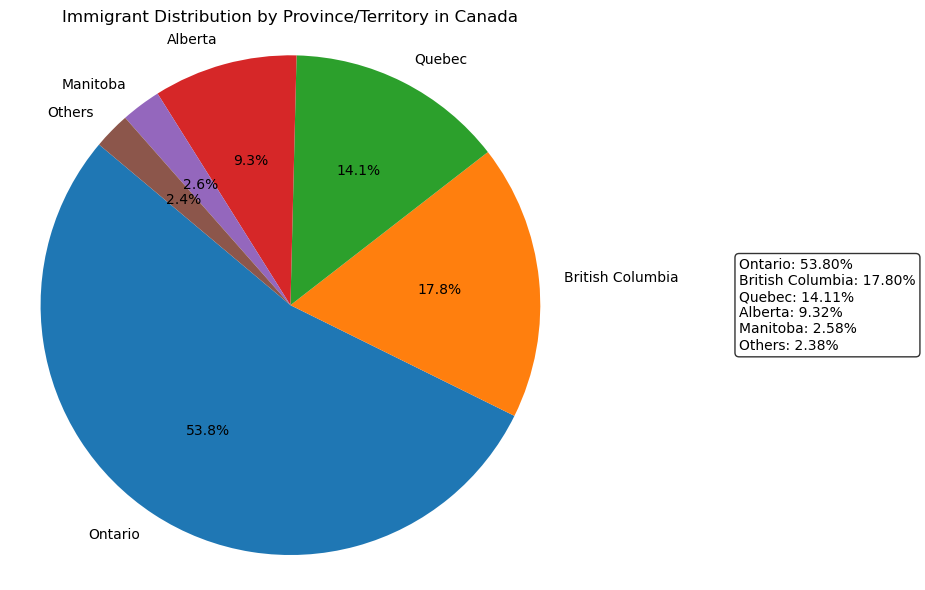

In [8]:
#Immigrant Distribution by Province/Territory in Canada

df_immigrants_provinces = df_by_region[df_by_region['immigration_status']=="Immigrants"]

# Calculate total and percentages
total = df_immigrants_provinces['population'].sum()
df_immigrants_provinces['percentage'] = (df_immigrants_provinces['population'] / total) * 100

# Sort by population
df_sorted = df_immigrants_provinces.sort_values(by='population', ascending=False)

# Group all regions with <1% into 'Others'
df_main = df_sorted[df_sorted['percentage'] >= 1].copy()
df_others = df_sorted[df_sorted['percentage'] < 1]

if not df_others.empty:
    others_row = pd.DataFrame([{
        'region': 'Others',
        'population': df_others['population'].sum(),
        'percentage': df_others['percentage'].sum()
    }])
    df_main = pd.concat([df_main, others_row], ignore_index=True)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    df_main['population'],
    labels=df_main['region'],
    autopct='%1.1f%%',
    startangle=140
)
ax.axis('equal')
plt.title('Immigrant Distribution by Province/Territory in Canada')

# Add legend-style percentage table
legend_labels = [
    f"{row['region']}: {row['percentage']:.2f}%" for _, row in df_main.iterrows()
]
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(1.3, 0.5, "\n".join(legend_labels), transform=ax.transAxes,
         fontsize=10, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16116\1435512228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immigrants_CMA['percentage'] = (df_immigrants_CMA['population'] / total) * 100


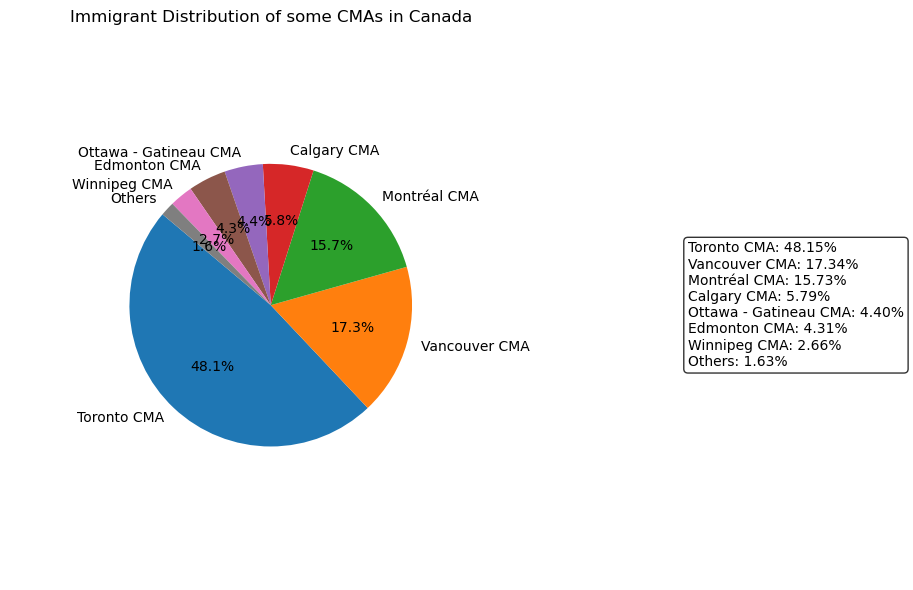

In [9]:
#Immigrant Distribution of some CMAs in Canada
df_immigrants_CMA = df_by_CMA[df_by_CMA['immigration_status']=="Immigrants"]

# Calculate total and percentages
total = df_immigrants_CMA['population'].sum()
df_immigrants_CMA['percentage'] = (df_immigrants_CMA['population'] / total) * 100

# Sort by population
df_sorted = df_immigrants_CMA.sort_values(by='population', ascending=False)

# Group all regions with <1% into 'Others'
df_main = df_sorted[df_sorted['percentage'] >= 1].copy()
df_others = df_sorted[df_sorted['percentage'] < 1]

if not df_others.empty:
    others_row = pd.DataFrame([{
        'region': 'Others',
        'population': df_others['population'].sum(),
        'percentage': df_others['percentage'].sum()
    }])
    df_main = pd.concat([df_main, others_row], ignore_index=True)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    df_main['population'],
    labels=df_main['region'],
    autopct='%1.1f%%',
    startangle=140
)
ax.axis('equal')
plt.title('Immigrant Distribution of some CMAs in Canada')

# Add legend-style percentage table
legend_labels = [
    f"{row['region']}: {row['percentage']:.2f}%" for _, row in df_main.iterrows()
]
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(1.3, 0.5, "\n".join(legend_labels), transform=ax.transAxes,
         fontsize=10, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

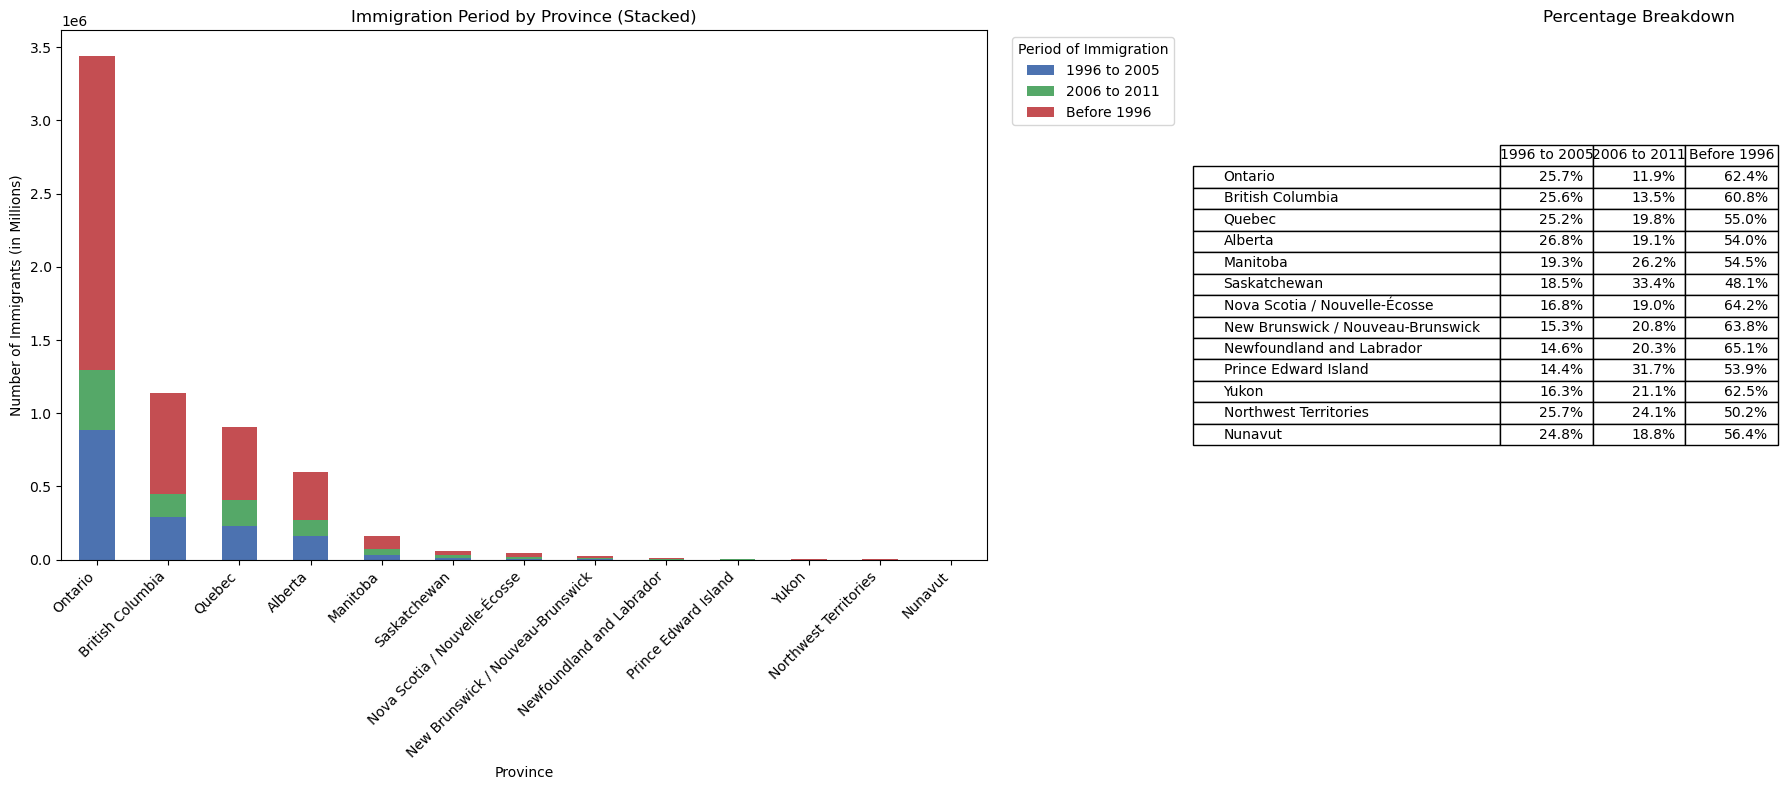

In [10]:
#Immigration Period by Province

periods = ['Before 1996', '1996 to 2005', '2006 to 2011']
df_plot = df_by_region[df_by_region['immigration_status'].isin(periods)]

#Pivot the data
df_pivot = df_plot.pivot(index='immigration_status', columns='region', values='population')

#Transpose so provinces are rows
df_transposed = df_pivot.T

#Sort provinces by total number of immigrants
df_transposed['Total'] = df_transposed.sum(axis=1)
df_transposed_sorted = df_transposed.sort_values(by='Total', ascending=False).drop(columns='Total')

#Calculate percentage table
df_percent = df_transposed_sorted.div(df_transposed_sorted.sum(axis=1), axis=0).multiply(100).round(1)

#Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [4, 1]})

#Stacked bar chart
df_transposed_sorted.plot(kind='bar', stacked=True, ax=ax1,
                          color=['#4C72B0', '#55A868', '#C44E52'])
ax1.set_title('Immigration Period by Province (Stacked)')
ax1.set_xlabel('Province')
ax1.set_ylabel('Number of Immigrants (in Millions)')
ax1.legend(title='Period of Immigration', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.set_xticklabels(df_transposed_sorted.index, rotation=45, ha='right')

#Percentage table
table_data = df_percent.astype(str) + '%'
ax2.axis('off')
table = ax2.table(cellText=table_data.values,
                  rowLabels=table_data.index,
                  colLabels=table_data.columns,
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax2.set_title('Percentage Breakdown')

plt.tight_layout()
plt.show()

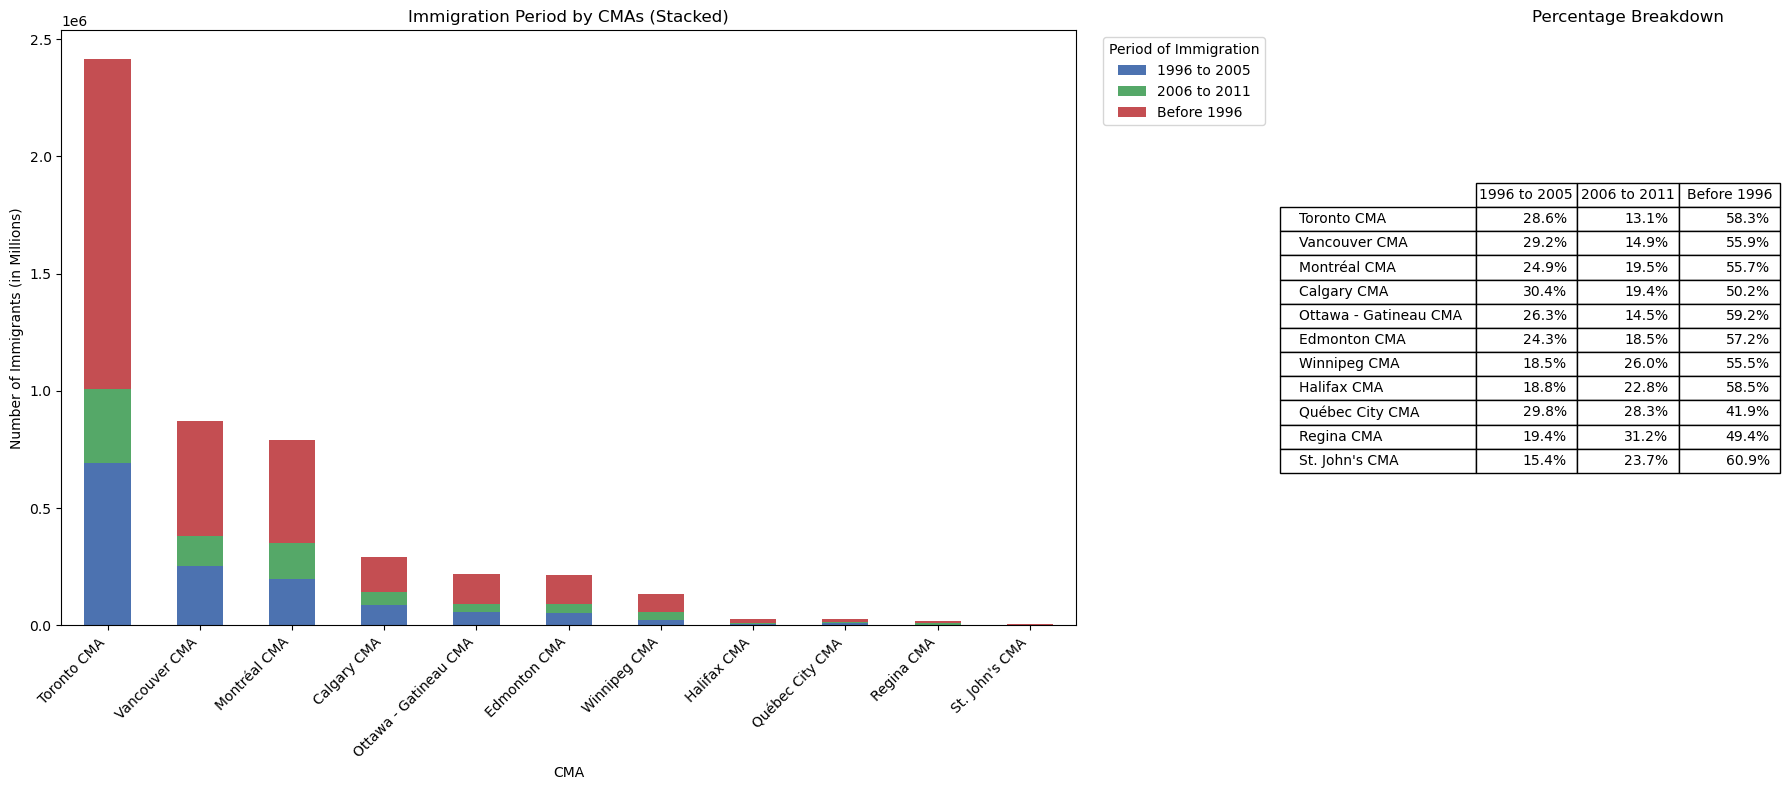

In [11]:
#Immigration Period by CMA

periods = ['Before 1996', '1996 to 2005', '2006 to 2011']
df_plot = df_by_CMA[df_by_CMA['immigration_status'].isin(periods)]

#Pivot the data
df_pivot = df_plot.pivot(index='immigration_status', columns='region', values='population')

#Transpose so provinces are rows
df_transposed = df_pivot.T

#Sort provinces by total number of immigrants
df_transposed['Total'] = df_transposed.sum(axis=1)
df_transposed_sorted = df_transposed.sort_values(by='Total', ascending=False).drop(columns='Total')

#Calculate percentage table
df_percent = df_transposed_sorted.div(df_transposed_sorted.sum(axis=1), axis=0).multiply(100).round(1)

#Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [4, 1]})

#Stacked bar chart
df_transposed_sorted.plot(kind='bar', stacked=True, ax=ax1,
                          color=['#4C72B0', '#55A868', '#C44E52'])
ax1.set_title('Immigration Period by CMAs (Stacked)')
ax1.set_xlabel('CMA')
ax1.set_ylabel('Number of Immigrants (in Millions)')
ax1.legend(title='Period of Immigration', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.set_xticklabels(df_transposed_sorted.index, rotation=45, ha='right')

#Percentage table
table_data = df_percent.astype(str) + '%'
ax2.axis('off')
table = ax2.table(cellText=table_data.values,
                  rowLabels=table_data.index,
                  colLabels=table_data.columns,
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax2.set_title('Percentage Breakdown')

plt.tight_layout()
plt.show()

Summary Insights for Immigration Periods by Province & CMA

Provinces Overview
    1. Older Immigrant Base: Most provinces show a dominant share of immigrants arriving before 1996. Newfoundland and Labrador (65.1%), Nova Scotia (64.2%), and New Brunswick (63.8%) have the highest proportions of long-established immigrants.
    2. Recent Waves Less Visible: The share of immigrants arriving after 2006 is generally modest in most provinces. Saskatchewan (33.4%) and Prince Edward Island (31.7%) are exceptions, indicating relatively newer settlement patterns.
    3. Balanced Provinces: Manitoba and Alberta have a more evenly distributed immigration pattern across all three periods, indicating sustained immigration over time.

CMA (Census Metropolitan Areas) Overview
    1. Toronto, Vancouver, and Montréal CMAs have the largest shares of immigrants arriving before 1996, but they also show a healthy influx post-1996 (esp. 1996–2005).
    2. Recent Growth CMAs: Calgary and Québec City CMAs stand out with high proportions from 1996–2005 and 2006–2011, suggesting newer waves of immigration.
    3. Québec City CMA is especially notable with nearly 58% of immigrants arriving after 1996, making it one of the most recent-growth CMAs in terms of immigration.